# MTA Project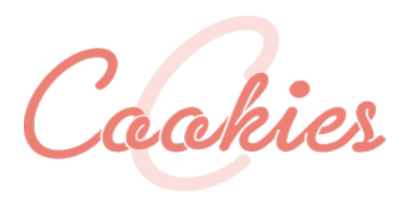

# Importing Modules

In [1]:
import pandas as pd
import datetime
import numpy as np
from scipy import stats
import seaborn as sns
import math 
import random
import datetime 
from pandas.api.types import CategoricalDtype
import datetime
from matplotlib.ticker import FuncFormatter
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine

# Data Ghathring

* Iterate using for loop to gather the data from data set

In [2]:
def get_data(week_nums,reset_index=True):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190803,190810,190817,190824,190831,190907,190914,190921,190928,191005,191012,191019,191026,191102,191109,191116,191123,191207]
data = get_data(week_nums)

# Data Exploring


In [3]:
#display data
data.head(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975


In [4]:
#display information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708990 entries, 0 to 205923
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [5]:
data.describe()

,ENTRIES,EXITS
count,3.708990e+06,3.708990e+06
mean,4.189158e+07,3.451705e+07
std,2.147341e+08,1.980588e+08
min,0.000000e+00,0.000000e+00
25%,2.959915e+05,1.324322e+05
50%,2.023496e+06,1.172749e+06
75%,6.641976e+06,4.546263e+06
max,2.129177e+09,2.123893e+09


In [6]:
data.shape

(3708990, 11)

In [7]:
data.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [8]:
data['STATION'].value_counts()

34 ST-PENN STA     77147
FULTON ST          72838
23 ST              55507
GRD CNTRL-42 ST    52844
86 ST              48100
                   ...  
CHAUNCEY ST         2253
GATES AV            2252
ORCHARD BEACH       1765
SUTTER AV           1519
CLEVELAND ST        1510
Name: STATION, Length: 378, dtype: int64

In [9]:
data['DATE'].value_counts().sort_index()

07/27/2019    29422
07/28/2019    29250
07/29/2019    29657
07/30/2019    30210
07/31/2019    29524
              ...  
12/02/2019    29290
12/03/2019    29218
12/04/2019    29498
12/05/2019    29997
12/06/2019    29318
Name: DATE, Length: 126, dtype: int64

In [10]:
data.groupby(['STATION']).size() # Display size of data frame grouped by stations

STATION
1 AV                8065
103 ST             12164
103 ST-CORONA       6804
104 ST              6796
110 ST              4697
                   ...  
WOODLAWN            3804
WORLD TRADE CTR    13733
WTC-CORTLANDT      26475
YORK ST             2268
ZEREGA AV           4530
Length: 378, dtype: int64

# Data Cleaning

In [11]:
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [12]:
# Remove all the spaces from columns names
data.columns = [column.strip() for column in data.columns]
data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
#number of rows
data.shape[0]

3708990

In [14]:
#check null
data.isna().sum() 

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3708990 entries, 0 to 205923
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 339.6+ MB


In [16]:
data["DATE_TIME"] = pd.to_datetime(data.DATE + " " + data.TIME)
data.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00


In [17]:
#add columns as turnstile(c/a& unit& scp& staition )
data['Turnstile']=data['C/A']+data['UNIT']+data['SCP']+data['STATION']
data.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,A002R05102-00-0059 ST


In [18]:
# Remove the duplicate 
# The duplicate values are RECOVR AUD
dada =data[data['DESC'] != 'RECOVR AUD' ]

In [19]:
# Removing duplicate 
data.drop_duplicates(inplace=True)

In [20]:
# Get rid of the duplicate entry
data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [21]:
(data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(4)  #No duplicate whene all the entries are ones

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-07-27 00:00:00,1
2472621,R138,R293,00-02-05,34 ST-PENN STA,2019-11-11 21:00:00,1
2472595,R138,R293,00-02-05,34 ST-PENN STA,2019-11-07 13:00:00,1
2472596,R138,R293,00-02-05,34 ST-PENN STA,2019-11-07 17:00:00,1


In [22]:
# Drop Desc Column to prevent errors in multiple run of cell, errors on drop is ignored
data = data.drop(["DESC"], axis=1, errors="ignore")
data.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,Turnstile
205923,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/06/2019,20:00:00,5554,420,2019-12-06 20:00:00,TRAM2R46900-05-01RIT-ROOSEVELT


In [23]:
#Make tunrstile_daily
turnstiles_daily = (data
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily.head(1)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,07/27/2019,7148908


In [24]:
# Adding two columns to turnstiles_daily_entries data frame
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))
turnstiles_daily.head(2)

<ipython-input-24-a8da65b6f3ba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE","ENTRIES"]


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,07/27/2019,7148908,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/28/2019,7149558,07/27/2019,7148908.0


In [25]:
# Drop the rows for the earliest date in the data
turnstiles_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)
turnstiles_daily.head(1)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,07/28/2019,7149558,07/27/2019,7148908.0


In [26]:
# Check if entries less than the previos entries
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1510,A002,R051,02-06-00,59 ST,12/05/2019,1091,12/04/2019,1.307240e+05
2652,A007,R079,01-05-01,5 AV/59 ST,08/05/2019,0,08/04/2019,1.000000e+00
4886,A011,R080,01-03-00,57 ST-7 AV,08/20/2019,885829427,08/19/2019,8.858297e+08
4887,A011,R080,01-03-00,57 ST-7 AV,08/21/2019,885828919,08/20/2019,8.858294e+08
4888,A011,R080,01-03-00,57 ST-7 AV,08/22/2019,885828367,08/21/2019,8.858289e+08
...,...,...,...,...,...,...,...,...
610376,R730,R431,00-00-04,EASTCHSTER/DYRE,12/03/2019,1559898486,12/02/2019,1.559899e+09
610377,R730,R431,00-00-04,EASTCHSTER/DYRE,12/04/2019,1559897894,12/03/2019,1.559898e+09
610378,R730,R431,00-00-04,EASTCHSTER/DYRE,12/05/2019,1559897251,12/04/2019,1.559898e+09
610379,R730,R431,00-00-04,EASTCHSTER/DYRE,12/06/2019,1559896621,12/05/2019,1.559897e+09


* Fixing the order problem for the entries

In [27]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
turnstiles_daily['DAILY_ENTRIES']=turnstiles_daily.apply(get_daily_counts,axis=1, max_counter=1000000)

In [28]:
# Creat a new data frame contains station, date ,daily_entries
station_daily_entries=turnstiles_daily.groupby(['STATION','DATE'])[['DAILY_ENTRIES']].sum().reset_index()

station_daily_entries.head(2)

,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/28/2019,4106.0
1,1 AV,07/29/2019,14483.0


In [29]:
total_station_entries=station_daily_entries.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
total_station_entries.head(2)                  

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,19154234.0
1,GRD CNTRL-42 ST,19091853.0


In [30]:
data['Time_str'] = data['TIME'].str[:2] #hours

In [31]:
data['Date_str']=data['DATE'].str[:2]#months

In [32]:
# Display the unique number of stations
len(data.STATION.unique())

378

In [33]:
## Creat turnstiles_daily_exits data frame
turnstile1_daily = (data
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())
turnstile1_daily.head(2)

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,07/27/2019,2419145
1,A002,R051,02-00-00,59 ST,07/28/2019,2419328


In [34]:
# Adding two columns to turnstiles_daily_exits data frame
turnstile1_daily[["PREV_DATE",'PREV_EXITS']] = (turnstile1_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE",'EXITS']
                                                   .apply(lambda grp: grp.shift(1)))
turnstile1_daily.head(2)

<ipython-input-34-031660ad161f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile1_daily[["PREV_DATE",'PREV_EXITS']] = (turnstile1_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE",'EXITS']


,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,07/27/2019,2419145,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/28/2019,2419328,07/27/2019,2419145.0


In [35]:
turnstile1_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)
turnstile1_daily.head(1)

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,07/28/2019,2419328,07/27/2019,2419145.0


In [36]:
# Check if exits less than the previos exits
turnstile1_daily[turnstile1_daily["EXITS"] < turnstile1_daily["PREV_EXITS"]].head(1)

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1510,A002,R051,02-06-00,59 ST,12/05/2019,37,12/04/2019,5574.0


In [37]:
turnstile1_daily['STATION'][turnstile1_daily["EXITS"] < turnstile1_daily["PREV_EXITS"]].value_counts()

GRD CNTRL-42 ST    268
14 ST              259
ELMHURST AV        249
161/YANKEE STAD    213
59 ST              146
                  ... 
181 ST               1
DELANCEY/ESSEX       1
207 ST               1
42 ST-BRYANT PK      1
5 AV/59 ST           1
Name: STATION, Length: 147, dtype: int64

In [38]:
#grouped by turnstile and station
(turnstile1_daily[turnstile1_daily["EXITS"] < turnstile1_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size()).head(2)

C/A   UNIT  SCP       STATION   
A002  R051  02-06-00  59 ST         1
A007  R079  01-05-01  5 AV/59 ST    1
dtype: int64

In [39]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
turnstile1_daily['DAILY_EXITS']=turnstile1_daily.apply(get_daily_counts,axis=1, max_counter=1000000)

In [40]:
# Creat a new data frame contains station, date ,daily_exits
station_daily_exits = turnstile1_daily.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()


,STATION,DATE,DAILY_EXITS
0,1 AV,07/28/2019,5309.0
1,1 AV,07/29/2019,16525.0
2,1 AV,07/30/2019,18206.0
3,1 AV,07/31/2019,19777.0
4,1 AV,08/01/2019,18010.0


In [41]:
total_station_exits=station_daily_exits.groupby('STATION').sum().sort_values('DAILY_EXITS', ascending=False).reset_index()
total_station_exits.head(2)

,STATION,DAILY_EXITS
0,GRD CNTRL-42 ST,19630873.0
1,34 ST-PENN STA,18457205.0


In [42]:
# Add the traffic column
data['TRAFFIC']=(turnstiles_daily['DAILY_ENTRIES']+turnstile1_daily['DAILY_EXITS'])
data.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,Turnstile,Time_str,Date_str,TRAFFIC
205923,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/06/2019,20:00:00,5554,420,2019-12-06 20:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,20,12,47.0
205922,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/06/2019,16:00:00,5554,420,2019-12-06 16:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,16,12,56.0


In [43]:
# Creat new data frame of the top 6 station of traffic
top6_stations=(data.groupby(['STATION'])['TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='TRAFFIC',ascending=False) 
                   .STATION.head(6))
top6_stations

61      34 ST-PENN STA
232    GRD CNTRL-42 ST
225          FULTON ST
46               23 ST
191       CORTLANDT ST
365            WALL ST
Name: STATION, dtype: object

In [44]:
# Sort data frame by traffic number in ascending
top6_stations=data[data['STATION'].isin(top6_stations)].sort_values(by='TRAFFIC',ascending=False)
top6_stations.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,Turnstile,Time_str,Date_str,TRAFFIC
55867,N073,R013,02-00-06,34 ST-PENN STA,ACE,IND,11/16/2019,23:00:00,2432206,2158942,2019-11-16 23:00:00,N073R01302-00-0634 ST-PENN STA,23,11,1280012.0
55867,N073,R013,02-00-01,34 ST-PENN STA,ACE,IND,10/31/2019,04:00:00,4324807,28479798,2019-10-31 04:00:00,N073R01302-00-0134 ST-PENN STA,04,10,1280012.0


In [45]:
# The repeated time for the busiest station
hours=data.groupby(data['STATION']=="34 STPENNSTA")['Time_str'].value_counts(sort=False)
hours.reset_index(drop=True)

0     311228
1     198273
2      24056
3      82436
4     312519
5     197685
6      25181
7      85261
8     315491
9     199030
10     25629
11     83447
12    311210
13    197480
14     25740
15     83265
16    310751
17    197017
18     25226
19     83384
20    310888
21    196580
22     24325
23     82801
Name: Time_str, dtype: int64

In [46]:
# Creat new data frame of the top 10 station of daily_entries
top10_stations=total_station_entries.groupby(['STATION'])[['DAILY_ENTRIES']]\
.sum().reset_index().sort_values(by='DAILY_ENTRIES',ascending=False).STATION.head(10)

top10_stations

61      34 ST-PENN STA
232    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
352     TIMES SQ-42 ST
225          FULTON ST
172           CANAL ST
110              86 ST
Name: STATION, dtype: object

In [47]:
# Creat new data frame of the top 10 station of daily_exits
top10_stations=total_station_exits.groupby(['STATION'])[['DAILY_EXITS']]\
.sum().reset_index().sort_values(by='DAILY_EXITS',ascending=False).STATION.head(10)

top10_stations

232    GRD CNTRL-42 ST
61      34 ST-PENN STA
59     34 ST-HERALD SQ
46               23 ST
352     TIMES SQ-42 ST
14      14 ST-UNION SQ
225          FULTON ST
68     42 ST-PORT AUTH
110              86 ST
9               125 ST
Name: STATION, dtype: object

In [48]:
mask = ((data["C/A"] == "A011") & 
(data["UNIT"] == "R080") & 
(data["SCP"] == "01-03-00") & 
(data["STATION"] == "57 ST-7 AV") &
(data["DATE_TIME"].dt.date == datetime.datetime(2019, 8, 27).date()))
data[mask].head(2)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,Turnstile,Time_str,Date_str,TRAFFIC
1619,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/27/2019,20:00:00,885825640,490347130,2019-08-27 20:00:00,A011R08001-03-0057 ST-7 AV,20,08,4771.0
1618,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,08/27/2019,16:00:00,885825940,490347655,2019-08-27 16:00:00,A011R08001-03-0057 ST-7 AV,16,08,2361.0


In [49]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST                1
A007   R079  01-05-01  5 AV/59 ST           1
A011   R080  01-03-00  57 ST-7 AV         102
A015   R081  00-03-01  49 ST                1
A025   R023  01-03-01  34 ST-HERALD SQ    125
                                         ... 
R645   R110  00-00-00  FLATBUSH AV-B.C      1
             00-03-02  FLATBUSH AV-B.C      5
R646   R110  01-00-01  FLATBUSH AV-B.C    123
R730   R431  00-00-04  EASTCHSTER/DYRE    125
TRAM1  R468  00-00-01  RIT-MANHATTAN        1
Length: 324, dtype: int64

In [50]:
stations_daily_top10 = total_station_entries[total_station_entries['STATION'].isin(top10_stations)]

In [51]:
#creat new datafreame to merge 
frames = [turnstiles_daily, turnstile1_daily]

result = pd.merge(turnstiles_daily,turnstile1_daily)
result.head(2)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,07/28/2019,7149558,07/27/2019,7148908.0,650.0,2419328,2419145.0,183.0
1,A002,R051,02-00-00,59 ST,07/29/2019,7150832,07/28/2019,7149558.0,1274.0,2419786,2419328.0,458.0


__Outlier Detection & Removal__

In [52]:
Q1=result['DAILY_EXITS'].quantile(0.25)
Q3=result['DAILY_ENTRIES'].quantile(0.75)

IQR=Q3-Q1
IQR

1407.0

In [53]:
print(' shape of dataset befor: ',result.shape)

 shape of dataset befor:  (610831, 12)


In [54]:
result=result[~((result['DAILY_ENTRIES']<(Q1-1.5*IQR))|(result['DAILY_EXITS']>(Q3+1.5*IQR)))]

In [55]:
print('Shape of dataset after:',result.shape)

Shape of dataset after: (595523, 12)


__find the correlation between entries and exits__

In [56]:
Corr_entries=turnstiles_daily['DAILY_ENTRIES'].mean(),turnstiles_daily['DAILY_ENTRIES'].std()
Corr_entries

(1167.5146398922125, 5851.937519669012)

In [57]:
Corr_exits=turnstile1_daily['DAILY_EXITS'].mean(),turnstile1_daily['DAILY_EXITS'].std()
Corr_exits

(945.7886682241078, 5381.134910819739)

In [58]:
#plt.scatter(Corr_entries, Corr_exits,color="magenta")
#plt.show()

Corr_entries = (turnstiles_daily['DAILY_ENTRIES']-np.mean(turnstiles_daily['DAILY_ENTRIES']))/np.std(turnstiles_daily['DAILY_ENTRIES'])
Corr_exits = (turnstile1_daily['DAILY_EXITS']-np.mean(turnstile1_daily['DAILY_EXITS']))/np.std(turnstile1_daily['DAILY_EXITS'])

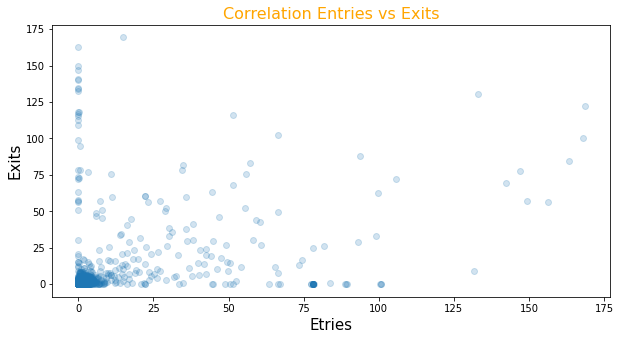

In [59]:
plt.figure(figsize=[10,5])
plt.scatter(Corr_entries,Corr_exits,alpha=0.2);
plt.xlabel('Etries',size=15)
plt.ylabel('Exits',size=15)
plt.title('Correlation Entries vs Exits',fontsize = 16,color='orange',);
plt.savefig('correlation-Scatter.png');

* find Variance of DAILY_ENTRIES,DAILY_EXITS

In [60]:
result.loc[:,['DAILY_ENTRIES','DAILY_EXITS']].var(axis=0)

DAILY_ENTRIES    1.073423e+07
DAILY_EXITS      6.106123e+05
dtype: float64

# Data Visualization

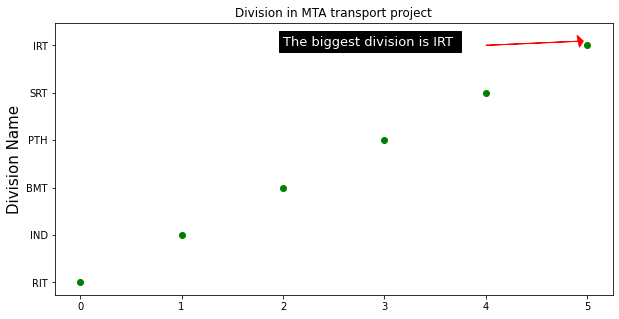

In [61]:
#chart for each division
plt.figure(figsize=[10,5])
division=['RIT','IND','BMT','PTH','SRT','IRT']
plt.plot(division,'o',color='green')
plt.title('Division in MTA transport project')
plt.ylabel('Division Name',fontsize=15)
plt.arrow(4, 5, 0.96, 0.090, color='red', head_length = 0.05, head_width = 0.25, length_includes_head = True) 
plt.text(2,5,'The biggest division is IRT ',fontsize = 13,backgroundcolor = 'k',color = 'white');
plt.savefig('division.png')

* The number of weekly entreis 

* The busiest station with the weekly entries

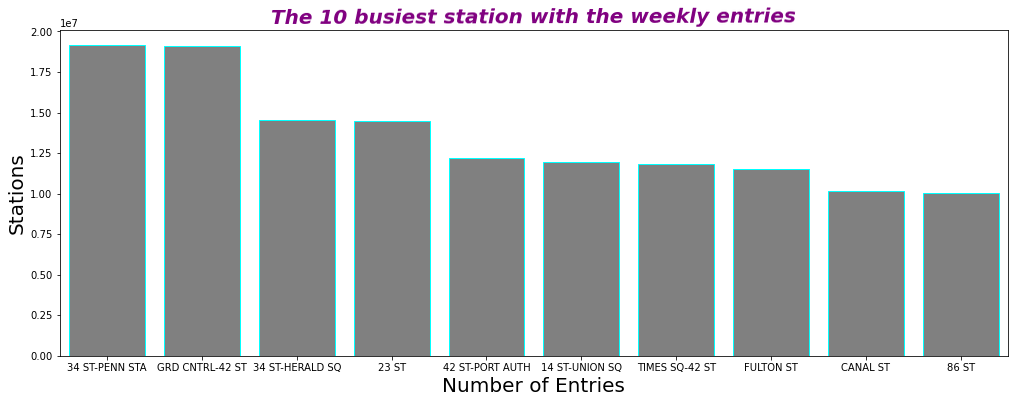

In [62]:
#The 10 busiest station with the weekly entries
plt.figure(figsize=(17,6))
sns.barplot(data=stations_daily_top10,x=total_station_entries['STATION'][:10] ,y =total_station_entries['DAILY_ENTRIES'][:10],color=(0.5, 0.5, 0.5, 0.5),  edgecolor='cyan')
plt.xlabel('Number of Entries',fontsize=20)
plt.ylabel('Stations',fontsize=20)
plt.title('The 10 busiest station with the weekly entries', style='italic',fontsize=20,weight='bold',rotation=0.17,color='purple');
plt.savefig('busiestentries.png')

* The busiest station is GRD CNTRL-42 ST

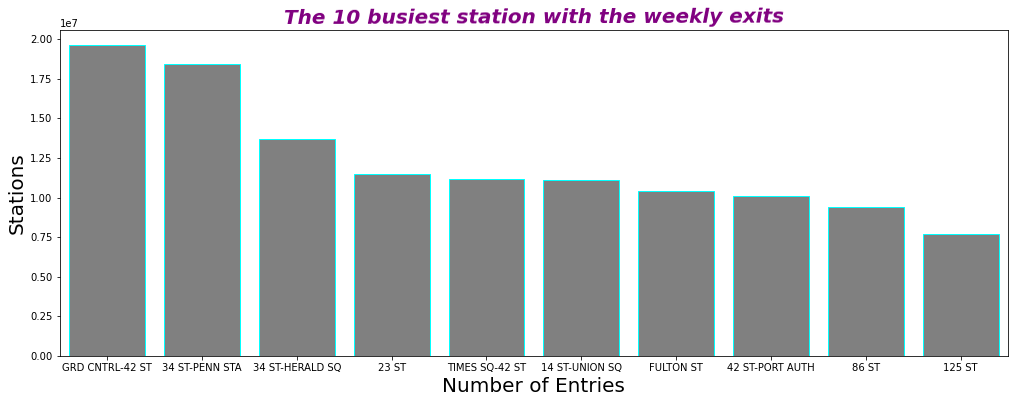

In [63]:
plt.figure(figsize=(17,6))

sns.barplot(data=stations_daily_top10, x=total_station_exits['STATION'][:10],y =total_station_exits['DAILY_EXITS'][:10],color=(0.5, 0.5, 0.5, 0.5),  edgecolor='cyan')
plt.title('The 10 busiest station with the weekly exits', style='italic',fontsize=20,weight='bold',rotation=0.17,color='purple');
plt.xlabel('Number of Entries',fontsize=20)
plt.ylabel('Stations',fontsize=20);
plt.savefig('busiestexits.png')

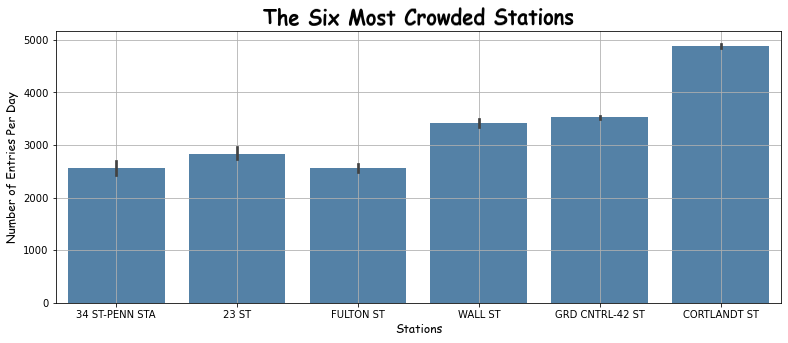

In [64]:
# The busiest station according to the traffic
plt.figure(figsize=(13,5))
sns.barplot(data=top6_stations, x='STATION',y='TRAFFIC',color='steelblue')
plt.xlabel('Stations',fontsize=12,family = 'fantasy')
plt.ylabel('Number of Entries Per Day',fontsize=12,family = 'fantasy')
plt.title('The Six Most Crowded Stations',family = 'fantasy',fontsize=20,weight='bold',rotation=0.17)
plt.grid()
plt.savefig('Crowded Stations.png')

* Rush hours

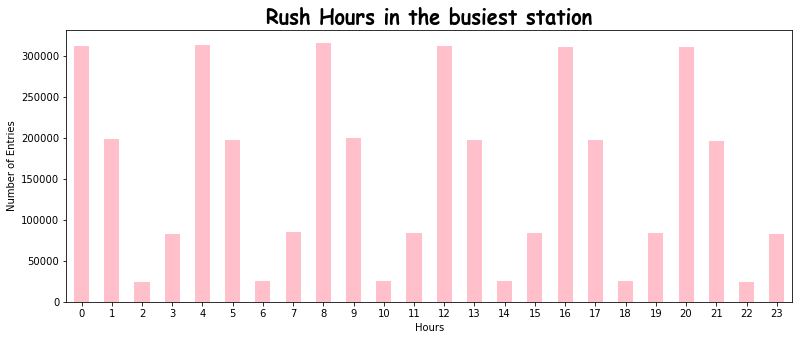

In [65]:
#Rush hours for the busiest station
plt.figure(figsize=(13,5))
hours.reset_index(drop=True).plot(kind='bar',color='pink')
plt.xlabel('Hours')
plt.ylabel('Number of Entries') 
plt.xticks(rotation=0)
plt.title('Rush Hours in the busiest station',family = 'fantasy',fontsize=20,weight='bold');
plt.savefig('Rush Hours.png')

__The rush hours 4,8,12 A.M                  &                                 12,4,8 P.M__

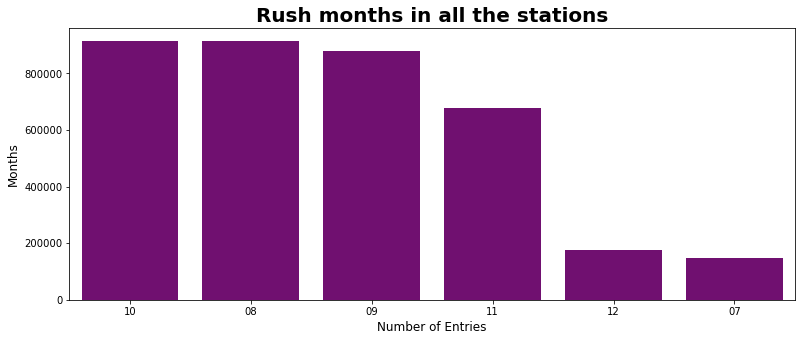

In [66]:
#Rush months for all the stations
plt.figure(figsize=(13,5))
sns.countplot(data=data, x='Date_str',order = data['Date_str'].value_counts().index,color='purple')
plt.xlabel('Number of Entries',fontsize=12)
plt.ylabel('Months',fontsize=12)
plt.title('Rush months in all the stations',fontsize=20,weight='bold');
plt.savefig('Rush months.png')

* The busiest months are August and October  of 2019

In [67]:
data.DATE.max()

'12/06/2019'

* Connect with SQLalchemy

In [68]:
#Creating a new DataFrame from the original DataFrame
data_mta = data[data['STATION']=="59 ST"]

In [69]:
data_mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,Turnstile,Time_str,Date_str,TRAFFIC
163852,R245A,R051,01-06-01,59 ST,456NQRW,IRT,12/06/2019,23:00:00,117492028,663269,2019-12-06 23:00:00,R245AR05101-06-0159 ST,23,12,0.0
163851,R245A,R051,01-06-01,59 ST,456NQRW,IRT,12/06/2019,19:00:00,117492006,663123,2019-12-06 19:00:00,R245AR05101-06-0159 ST,19,12,0.0
163850,R245A,R051,01-06-01,59 ST,456NQRW,IRT,12/06/2019,15:00:00,117491925,662421,2019-12-06 15:00:00,R245AR05101-06-0159 ST,15,12,0.0
163849,R245A,R051,01-06-01,59 ST,456NQRW,IRT,12/06/2019,11:00:00,117491911,662088,2019-12-06 11:00:00,R245AR05101-06-0159 ST,11,12,0.0
163848,R245A,R051,01-06-01,59 ST,456NQRW,IRT,12/06/2019,07:00:00,117491885,661834,2019-12-06 07:00:00,R245AR05101-06-0159 ST,07,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,7148647,2419101,2019-07-27 16:00:00,A002R05102-00-0059 ST,16,07,1853.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,7148441,2419042,2019-07-27 12:00:00,A002R05102-00-0059 ST,12,07,1982.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,7148326,2418975,2019-07-27 08:00:00,A002R05102-00-0059 ST,08,07,1732.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,7148306,2418939,2019-07-27 04:00:00,A002R05102-00-0059 ST,04,07,833.0


In [70]:
#Create the connection using the imported create_engine function and then invoking the connect method on it.
engine = create_engine('sqlite:///save_pandas.db', echo=True)
sqlite_connection = engine.connect()

2021-10-10 19:24:06,956 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-10-10 19:24:06,956 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:24:06,957 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-10-10 19:24:06,958 INFO sqlalchemy.engine.base.Engine ()


In [72]:
sqlite_table = "Turnstile_1"
data_mta.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-10-10 19:24:54,426 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Turnstile_1")
2021-10-10 19:24:54,427 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:24:54,428 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Turnstile_1")
2021-10-10 19:24:54,430 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:24:54,433 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Turnstile_1" (
	"index" BIGINT, 
	"C/A" TEXT, 
	"UNIT" TEXT, 
	"SCP" TEXT, 
	"STATION" TEXT, 
	"LINENAME" TEXT, 
	"DIVISION" TEXT, 
	"DATE" TEXT, 
	"TIME" TEXT, 
	"ENTRIES" BIGINT, 
	"EXITS" BIGINT, 
	"DATE_TIME" DATETIME, 
	"Turnstile" TEXT, 
	"Time_str" TEXT, 
	"Date_str" TEXT, 
	"TRAFFIC" FLOAT
)


2021-10-10 19:24:54,434 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:24:54,443 INFO sqlalchemy.engine.base.Engine COMMIT
2021-10-10 19:24:54,444 INFO sqlalchemy.engine.base.Engine CREATE INDEX "ix_Turnstile_1_index" ON "Turnstile_1" ("index")
2021-10-10 19:24:54,445 INFO sqlalchemy.engine.base.Eng

In [ ]:
all_tables = engine.table_names()
all_tables

In [73]:
data_mta=pd.read_sql('select * from Turnstile limit 10; ', engine)
data_mta

2021-10-10 19:25:01,227 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("select * from Turnstile limit 10; ")
2021-10-10 19:25:01,229 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:25:01,230 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("select * from Turnstile limit 10; ")
2021-10-10 19:25:01,231 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:25:01,233 INFO sqlalchemy.engine.base.OptionEngine select * from Turnstile limit 10; 
2021-10-10 19:25:01,234 INFO sqlalchemy.engine.base.OptionEngine ()


,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,20:00:00,REGULAR,7148908,2419145
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,00:00:00,REGULAR,7149087,2419165
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,04:00:00,REGULAR,7149111,2419171
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,08:00:00,REGULAR,7149126,2419198
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,12:00:00,REGULAR,7149198,2419241


In [75]:
data_mta=pd.read_sql('SELECT STATION,DATE,TIME FROM Turnstile group by DIVISION; ', engine)
data_mta

2021-10-10 19:25:05,922 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT STATION,DATE,TIME FROM Turnstile group by DIVISION; ")
2021-10-10 19:25:05,923 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:25:05,924 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT STATION,DATE,TIME FROM Turnstile group by DIVISION; ")
2021-10-10 19:25:05,925 INFO sqlalchemy.engine.base.Engine ()
2021-10-10 19:25:05,928 INFO sqlalchemy.engine.base.OptionEngine SELECT STATION,DATE,TIME FROM Turnstile group by DIVISION; 
2021-10-10 19:25:05,929 INFO sqlalchemy.engine.base.OptionEngine ()


,STATION,DATE,TIME
0,59 ST,07/27/2019,00:00:00
1,59 ST,07/27/2019,00:00:00


In [74]:
#Close the database connection.
sqlite_connection.close()

In [ ]:
data.head(2)